In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
import pandas as pd
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

In [4]:
x_train = train_data[:,1:]
y_train = train_data[:,0]
x_test = test_data[:,1:]
y_test = test_data[:,0]

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [7]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2, random_state=1)

In [8]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Class distribution in testing set')

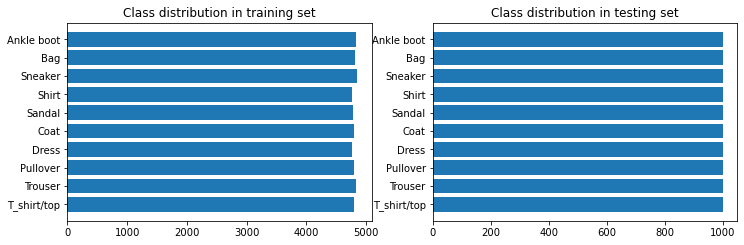

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

plt.subplot(2, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

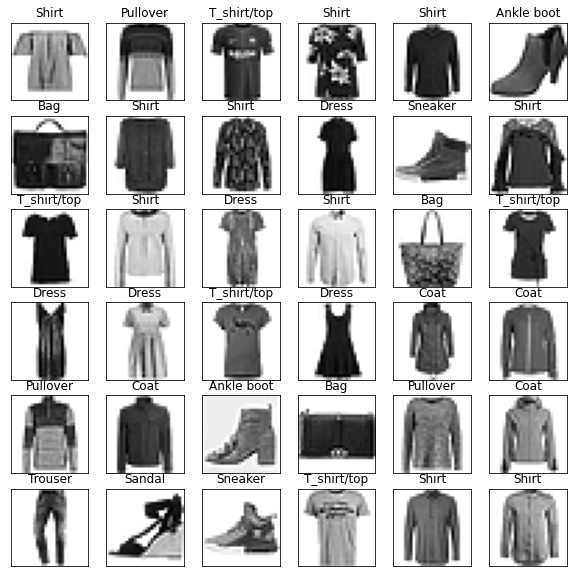

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()
plt.tight_layout()

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1500/1500 [==============================] - 49s 32ms/step - loss: 0.4307 - accuracy: 0.8450 - val_loss: 0.3405 - val_accuracy: 0.8765
Epoch 2/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2864 - accuracy: 0.8964 - val_loss: 0.3028 - val_accuracy: 0.8907
Epoch 3/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2376 - accuracy: 0.9129 - val_loss: 0.2483 - val_accuracy: 0.9105
Epoch 4/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2040 - accuracy: 0.9248 - val_loss: 0.2560 - val_accuracy: 0.9072
Epoch 5/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.1746 - accuracy: 0.9358 - val_loss: 0.2327 - val_accuracy: 0.9152
Epoch 6/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1490 - accuracy: 0.9453 - val_loss: 0.2302 - val_accuracy: 0.9203
Epoch 7/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.1263 - accuracy: 0.9521 - val_loss: 0.2427 -

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 4s 11ms/step - loss: 0.2695 - accuracy: 0.9216
Test accuracy: 0.9215999841690063


Text(0.5, 1.0, 'Accuracy evolution')

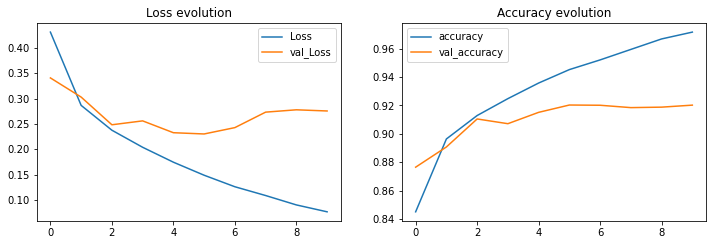

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [16]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 4s 11ms/step


In [17]:
test_img = x_test[0]
prediction = model.predict(x_test)
prediction[0]

313/313 [==============================] - 3s 10ms/step


array([9.9995077e-01, 9.1462775e-11, 3.5575588e-06, 7.0471252e-08,
       6.0464254e-06, 1.1612424e-08, 3.9443818e-05, 3.5837291e-11,
       3.9060735e-10, 4.0422751e-10], dtype=float32)

In [18]:
np.argmax(prediction[0])

0

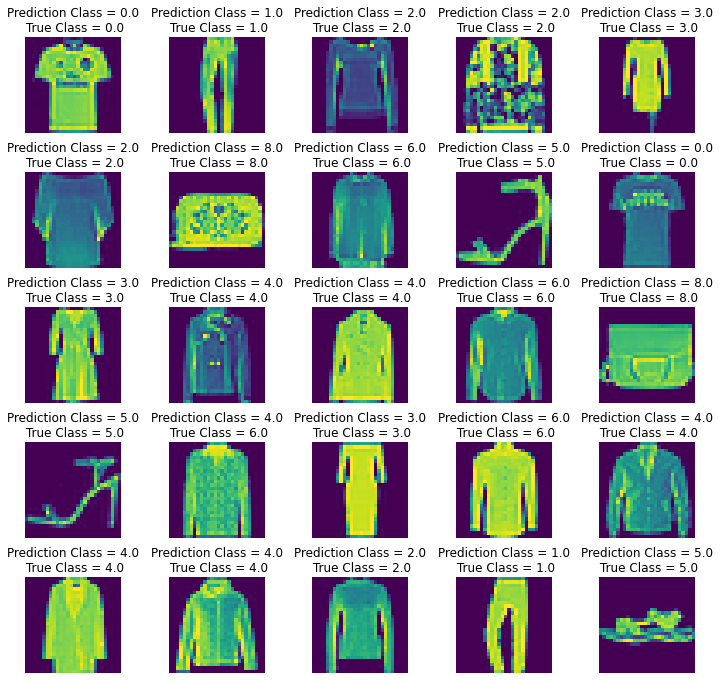

In [19]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {(predicted_classes[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)